In [28]:
#importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [29]:
# Read data

df= pd.read_csv('HousePrices.csv')

In [30]:
# Explore Data

df.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [31]:
# info about data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

In [32]:
# Check for missing values

missing = [i for i in df.columns if df[i].isnull().sum() > 0]
missing   # - > represents the columns with missing values

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

<AxesSubplot:>

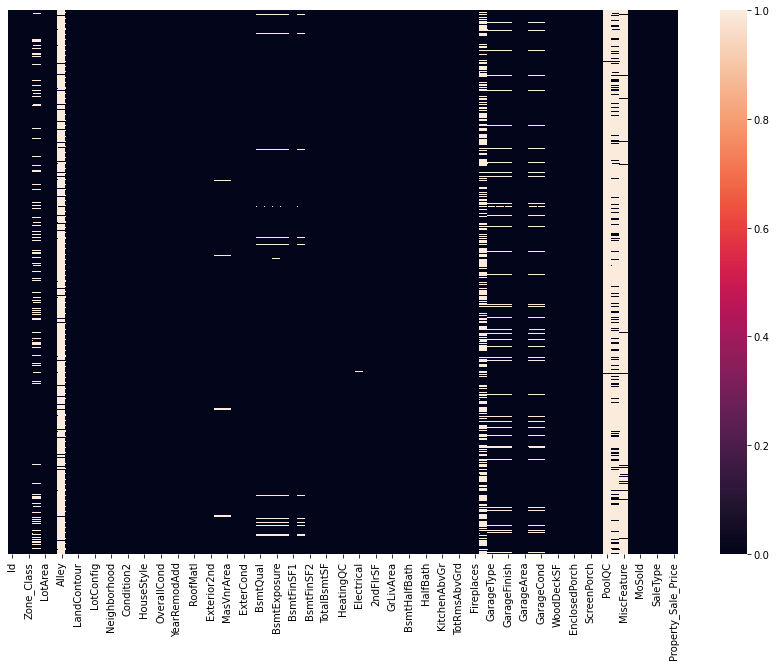

In [405]:
# Visualizing missing values

plt.figure(figsize=(15,10))
sns.heatmap(df.isna(), yticklabels = False)

In [406]:
# Droping Id

df.drop('Id', axis = 1, inplace = True)

In [407]:
# Extracting categorical columns

cat_cols = list(df.select_dtypes(include = 'O'))

print(f'Categorical columns : {cat_cols}')

Categorical columns : ['Zone_Class', 'Road_Type', 'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [408]:
# Extracting Numerical columns

num_cols = list(df.select_dtypes(exclude = 'O'))

print(f'Numerical columns : {num_cols}')

Numerical columns : ['Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Property_Sale_Price']


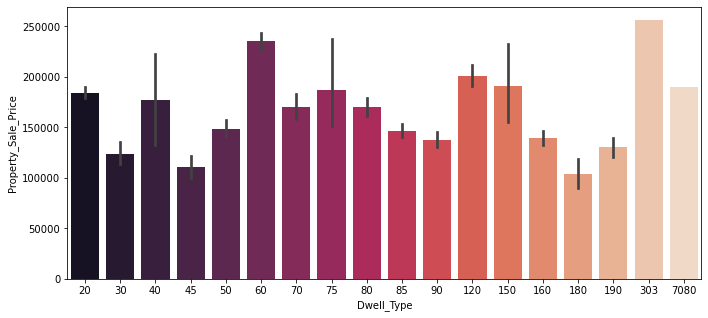

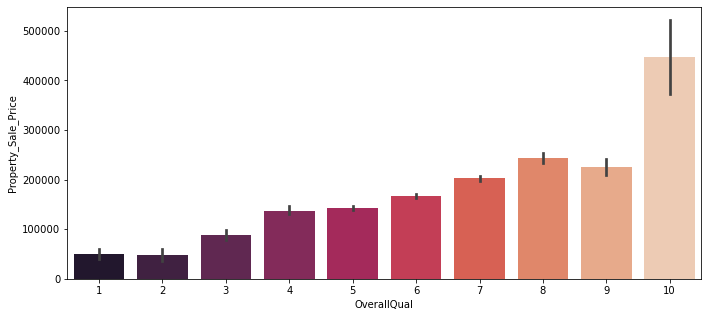

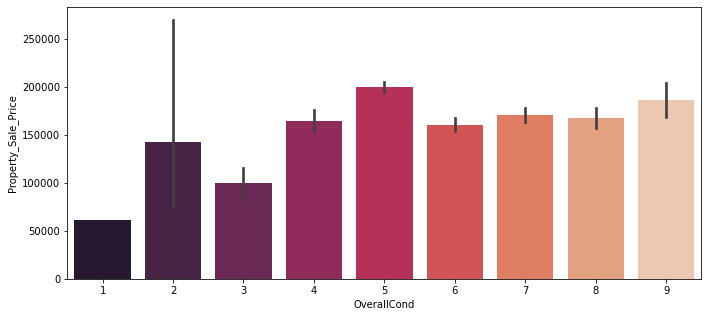

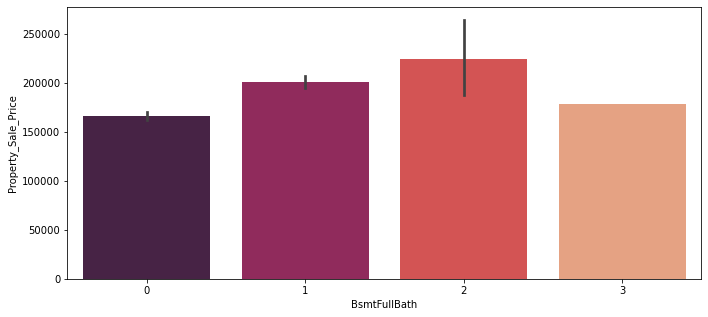

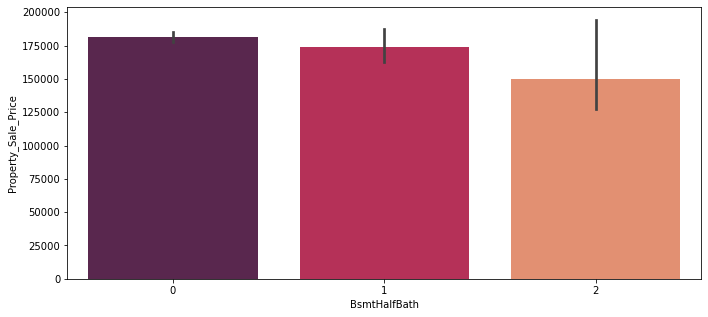

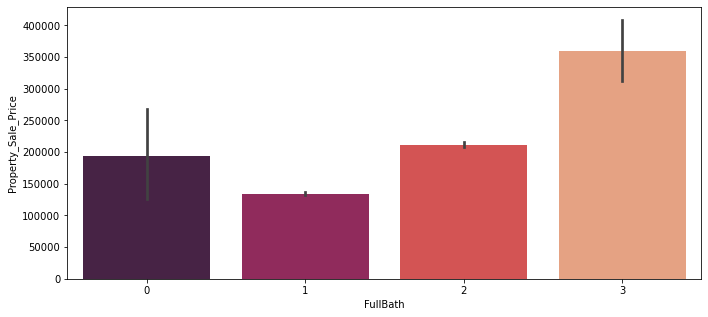

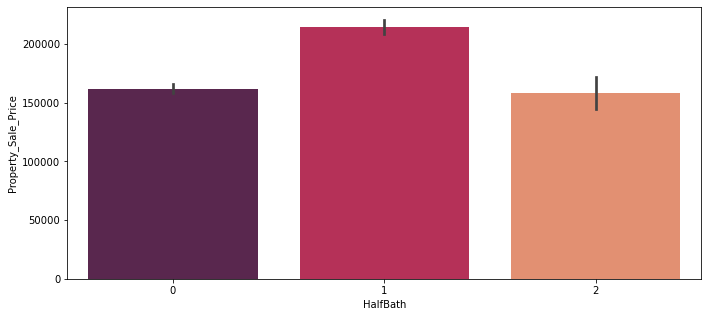

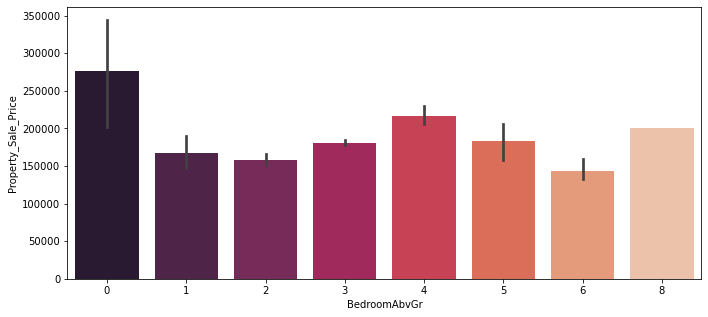

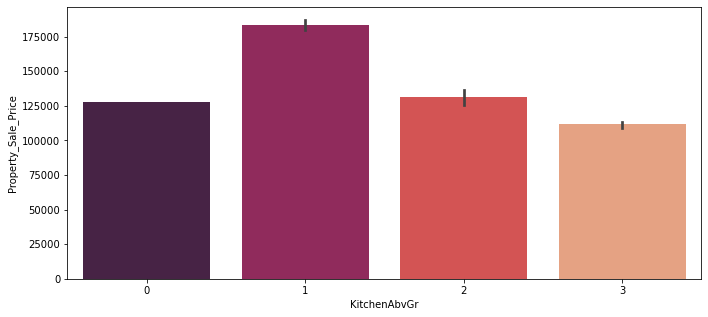

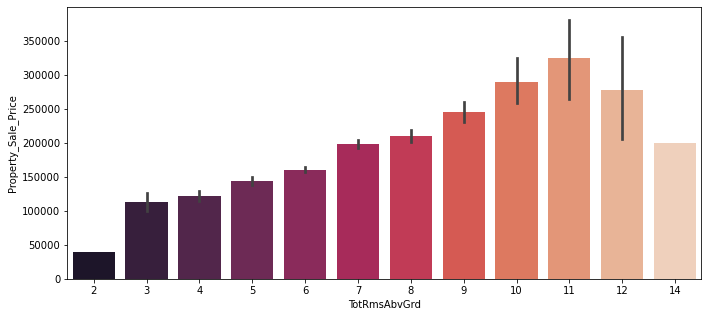

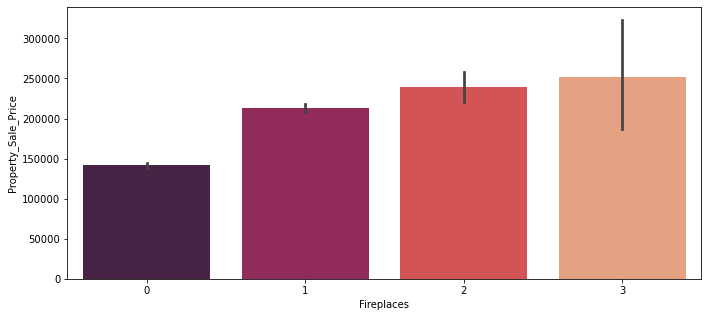

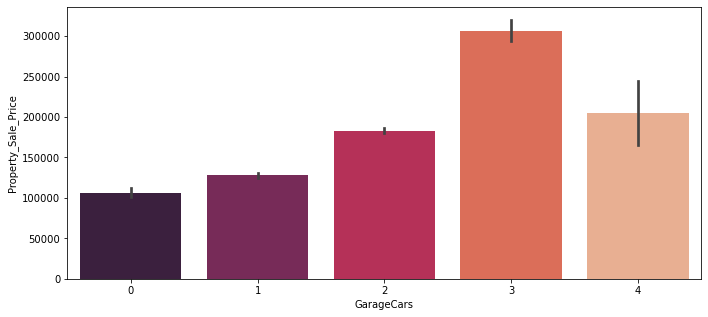

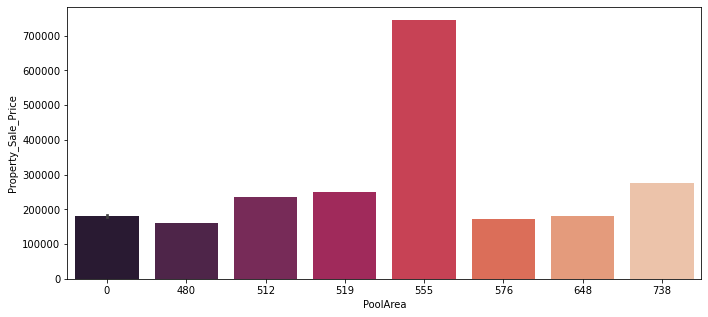

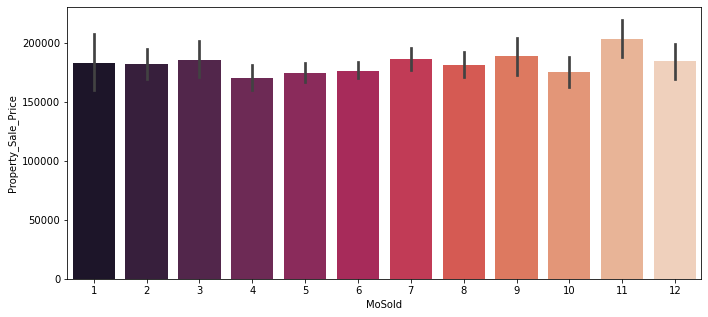

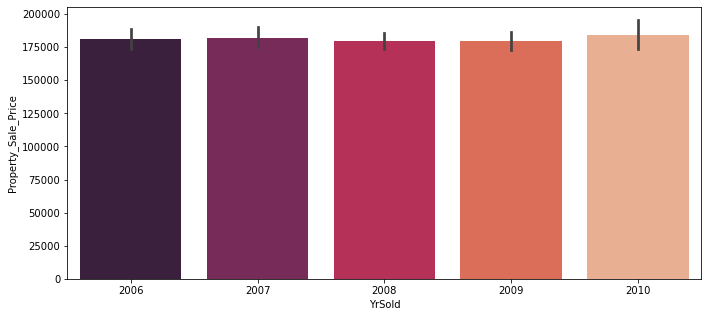

In [383]:
# Inferencing the data

for i,j  in enumerate(num_cols):
    i = 1
    if len(df[j].unique()) < 20:
        plt.figure(figsize = (25,5))
        plt.subplot(1,2,i)
        sns.barplot(x = df[j], y = df.Property_Sale_Price, palette = "rocket")
        i += 1

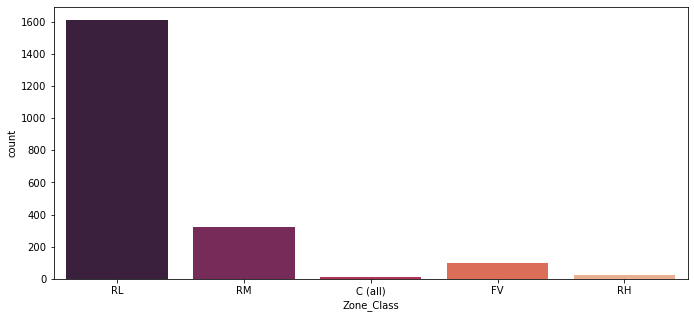

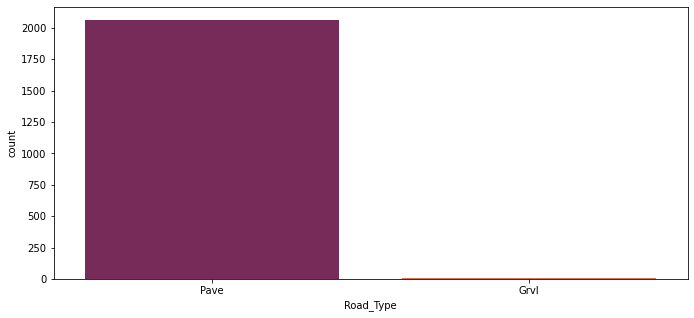

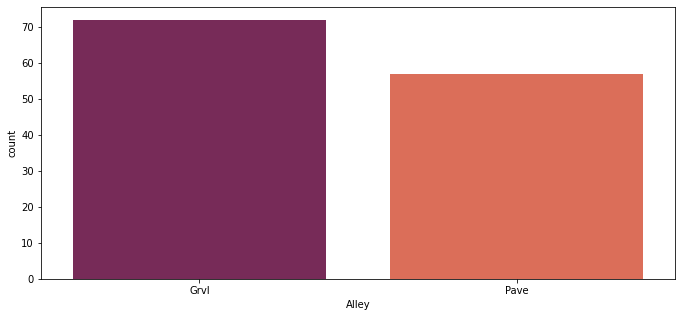

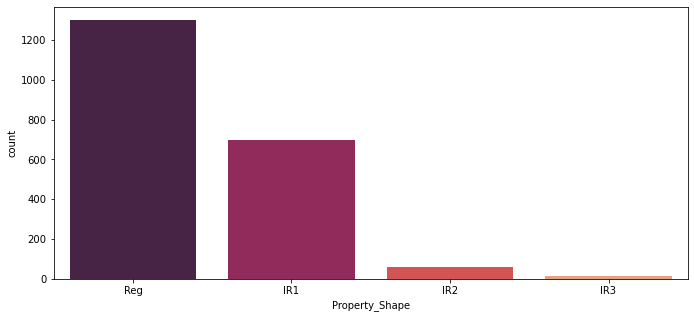

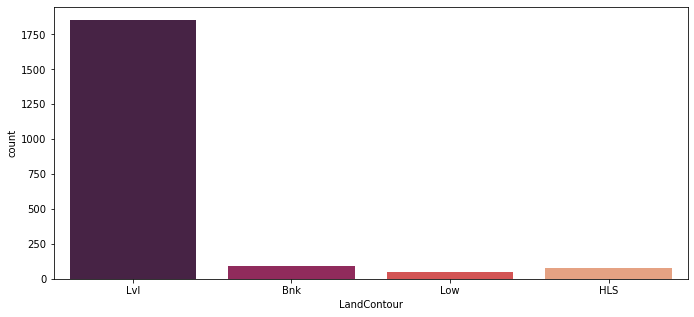

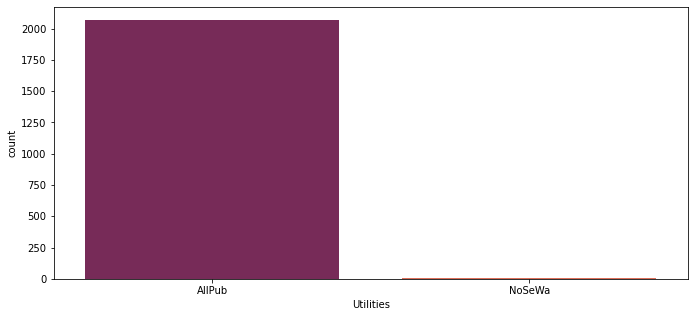

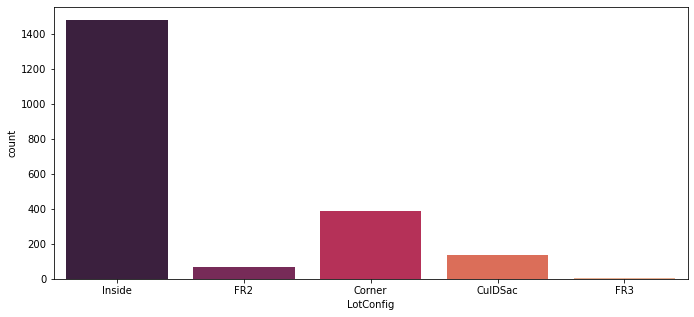

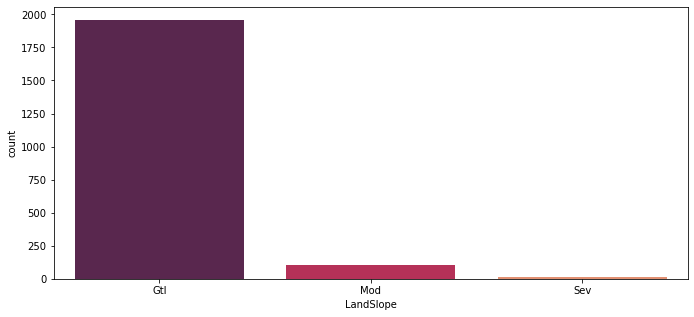

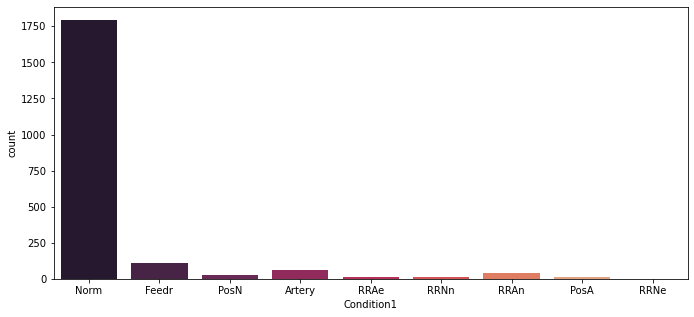

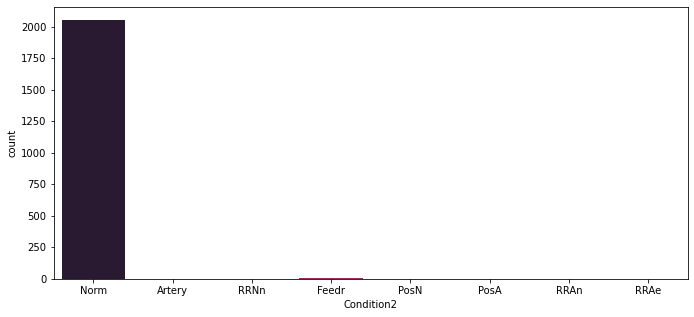

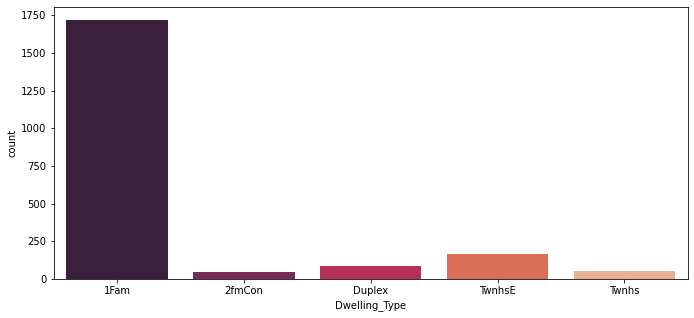

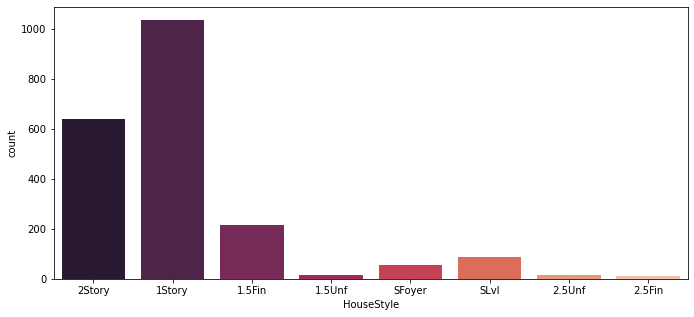

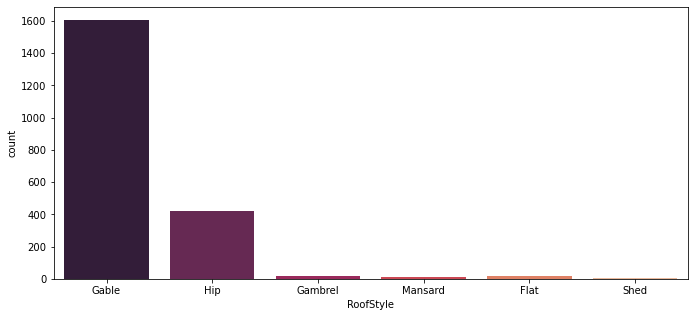

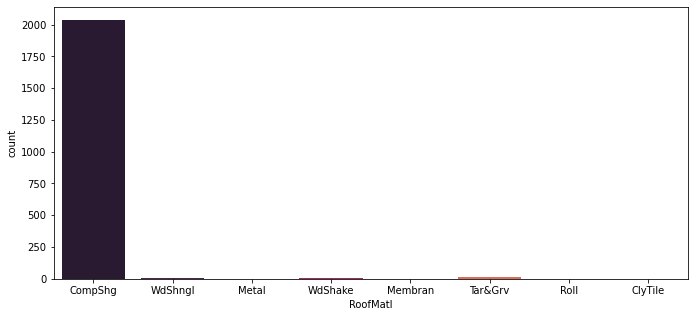

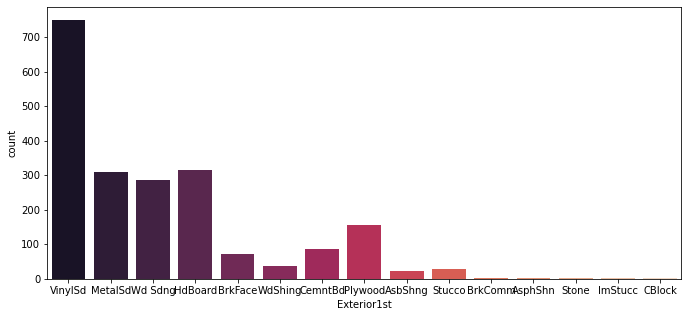

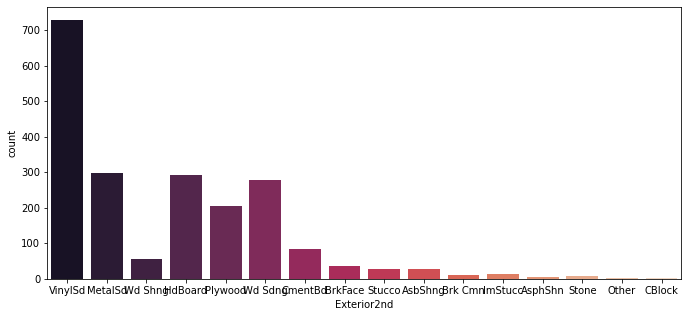

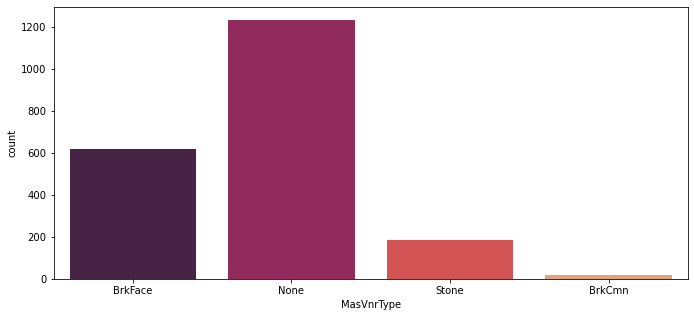

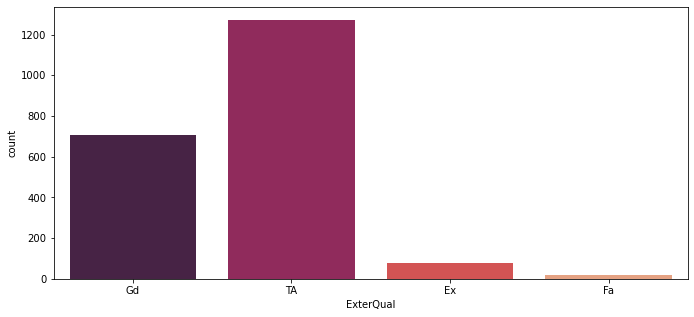

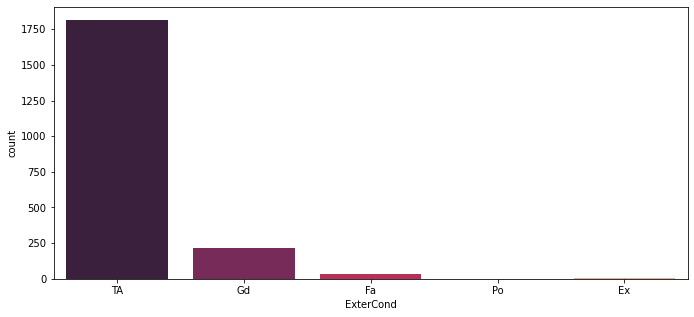

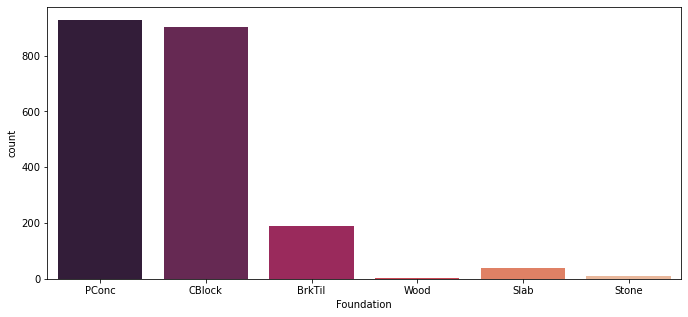

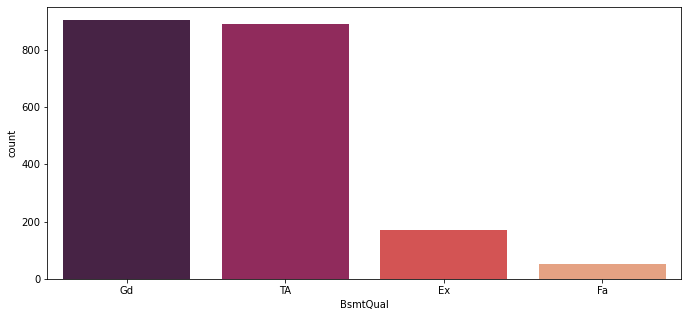

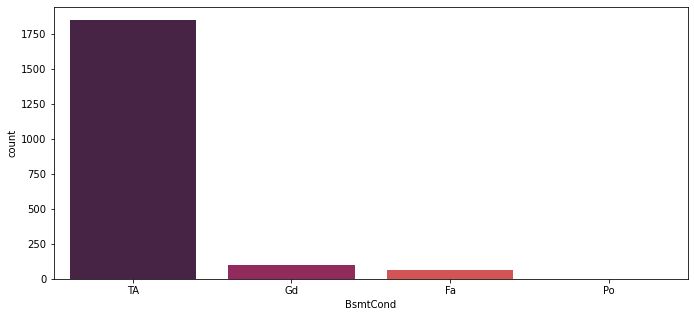

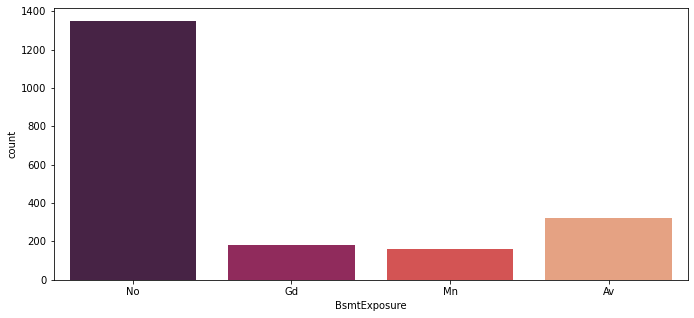

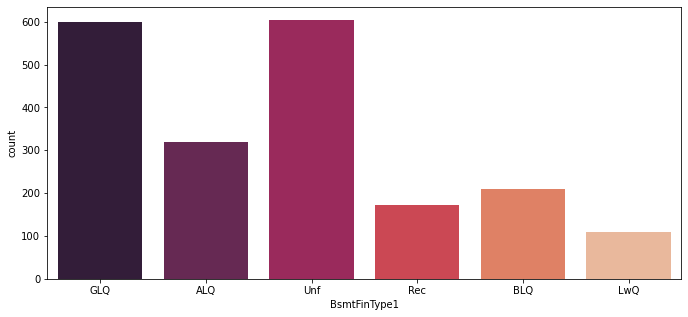

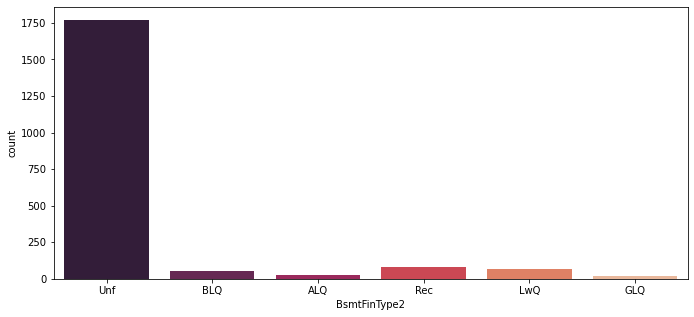

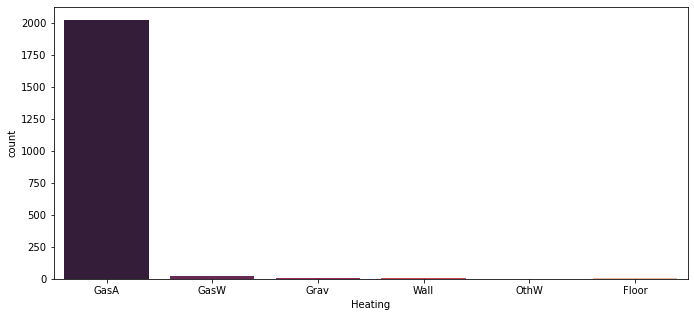

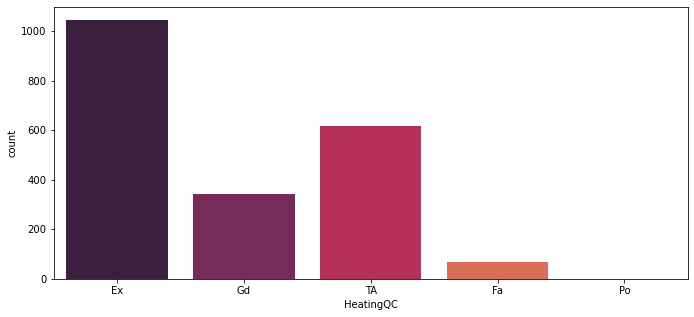

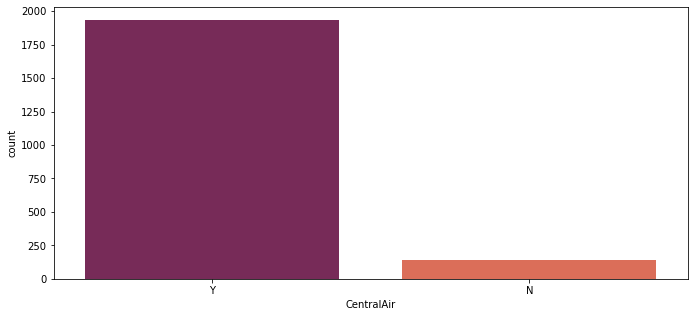

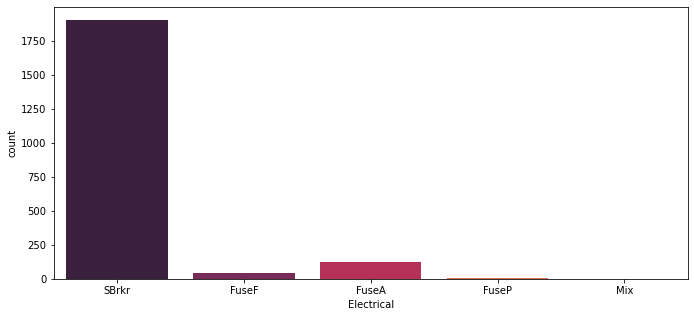

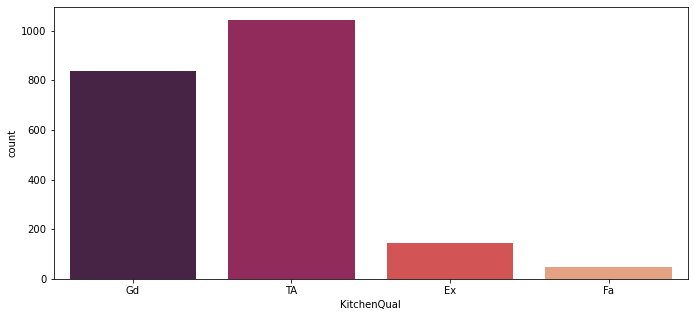

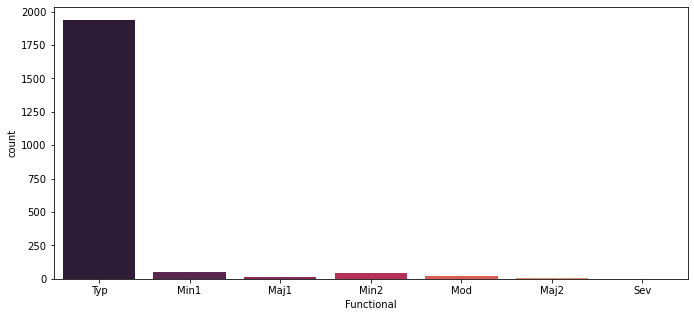

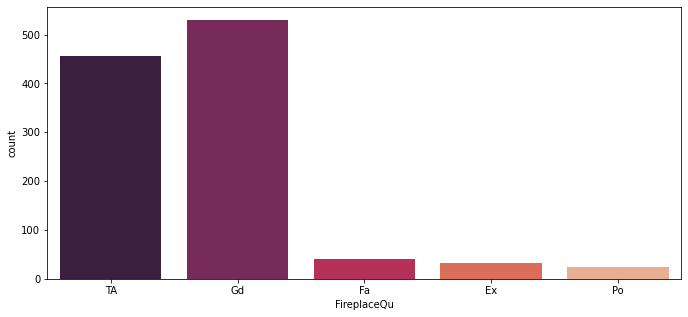

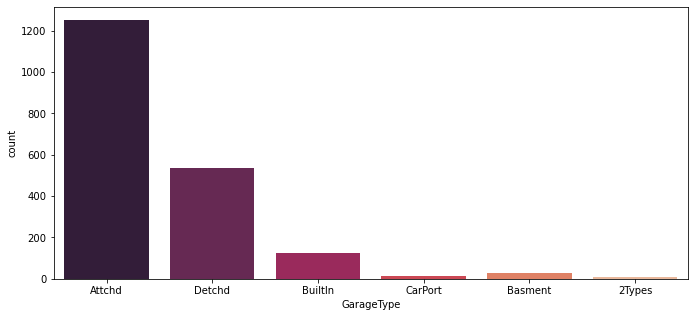

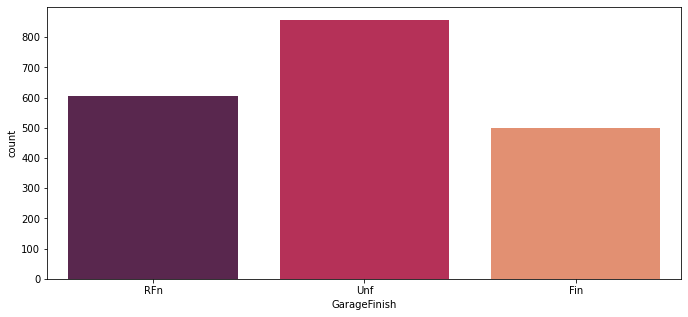

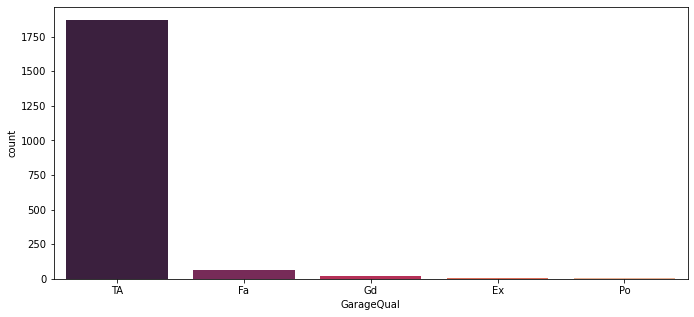

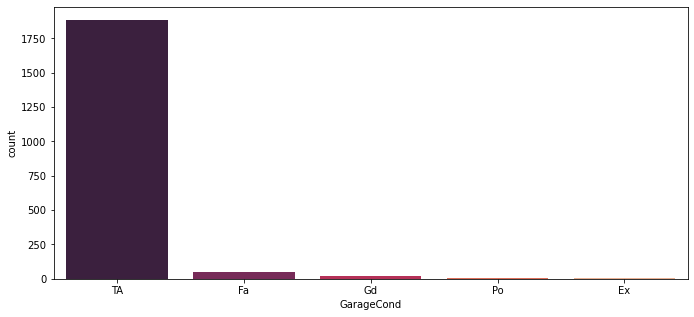

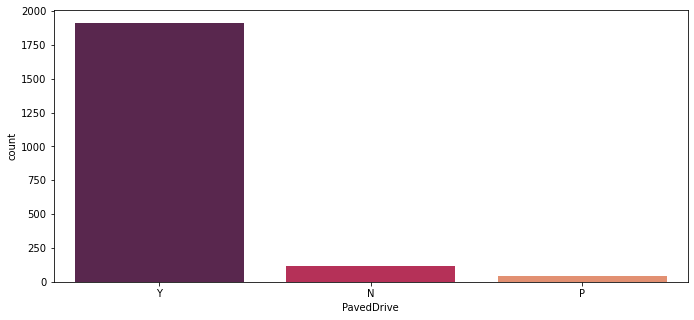

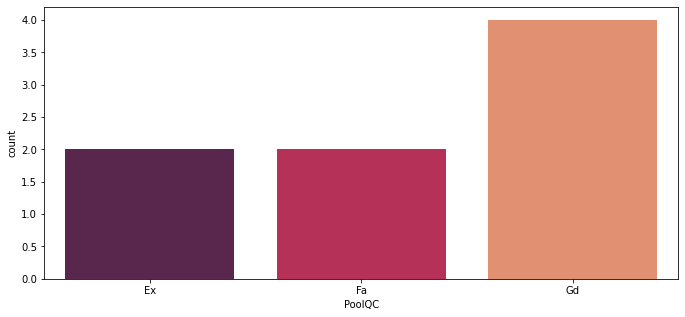

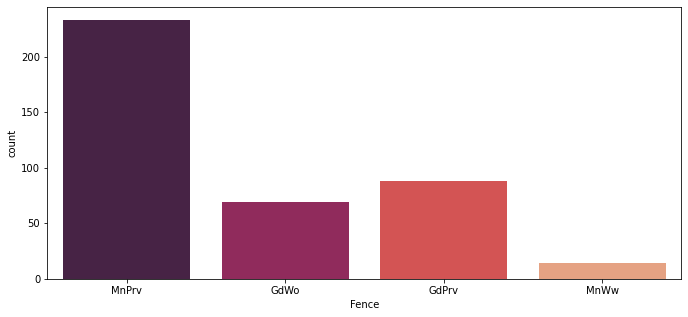

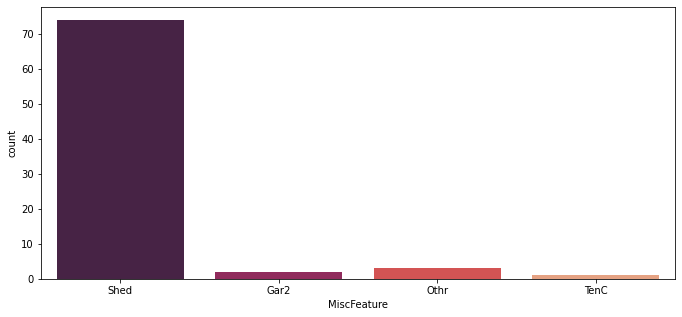

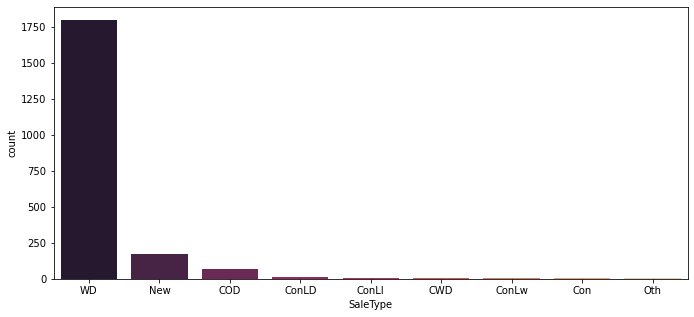

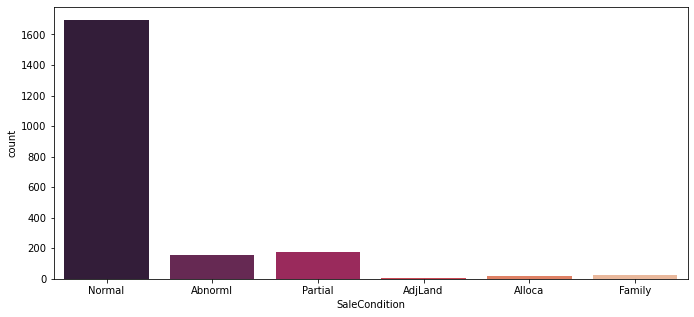

In [384]:
for i,j  in enumerate(cat_cols):
    i = 1
    if len(df[j].unique()) < 20:
        plt.figure(figsize = (25,5))
        plt.subplot(1,2,i)
        sns.countplot(x = df[j], palette = 'rocket')
        i += 1

In [33]:
# From problem description the Entries are wrongly entered

df.drop(df[df.Dwell_Type == 303].index , axis=0 , inplace=True)
df.drop(df[df.Dwell_Type == 7080].index , axis=0, inplace=True)

In [34]:
# Removing the unbalanced columns from dataset

df.drop(['Road_Type','LandContour','Utilities', 'LandSlope','Neighborhood'],axis = 1,inplace=True)

In [36]:
# Treating missing values

# LotFrontage
df['LotFrontage'].replace(np.nan,df['LotFrontage'].mean(),inplace=True)

# Alley
df['Alley']=df['Alley'].replace(np.nan , 'NA')

# FireplaceQu
df['FireplaceQu'].replace(np.nan,'Na',inplace=True)

# Fence
df['Fence'].replace(np.nan,'Na',inplace=True)

# PoolQC
df['PoolQC'].replace(np.nan,'Na',inplace=True)

# MiscFeature
df['MiscFeature'].replace(np.nan,'Na',inplace=True)

# LotFrontage
df['LotFrontage'].replace(np.nan,df['LotFrontage'].mean(),inplace=True)

# MasVnrType
df['MasVnrType'].replace(np.nan,df['MasVnrType'].mode()[0],inplace=True)

# MasVnrArea
df['MasVnrArea'].replace(np.nan,df['MasVnrArea'].mode()[0],inplace=True)

# BsmtQual
df['BsmtQual'].replace(np.nan,'Na',inplace=True)

# BsmtCond
df['BsmtCond'].replace(np.nan,'Na',inplace=True)

# BsmtExposure
df['BsmtExposure'].replace(np.nan,'Na',inplace=True)

# BsmtFinType1
df['BsmtFinType1'].replace(np.nan,'Na',inplace=True)

# BsmtFinType2
df['BsmtFinType2'].replace(np.nan,df['BsmtFinType2'].mode()[0],inplace=True)

# Electrical
df['Electrical'].replace(np.nan,df['Electrical'].mode()[0],inplace=True)

# GarageType
df['GarageType'].replace(np.nan,'Na',inplace=True)

# GarageYrBlt
df['GarageYrBlt'].replace(np.nan,df['GarageYrBlt'].mode()[0],inplace=True)

# GarageFinish
df['GarageFinish'].replace(np.nan,'Na',inplace=True)

# GarageQual
df['GarageQual'].replace(np.nan,'Na',inplace=True)

# GarageCond
df['GarageCond'].replace(np.nan,'Na',inplace=True)

# ExterCond
df['ExterCond']=df['ExterCond'].replace(np.nan , df['ExterCond'].mode()[0] )

In [37]:
# Adding new column Age of House and years after remodeling 

df['age'] = 2022-df.YearBuilt
df['no_of_years_after_remodel'] = 2022-df.YearRemodAdd

In [38]:
# Droping yearBuilt, YearRemodAdd columns

df.drop(['YearBuilt','YearRemodAdd','RoofMatl','YrSold','ExterCond'],axis=1,inplace=True)

# df.drop('ExterCond', axis = 1, inplace = True)

In [39]:
# Encoding Ordinal columns

# ExterQual
mapping={'TA':2,'Gd':3,'Ex':4,'Fa':1}
df['ExterQual']=df['ExterQual'].map(mapping)

# BsmtQual
mapping={'TA':3,'Gd':4,'Ex':5,'Fa':2,'Na':1}
df['BsmtQual']=df['BsmtQual'].map(mapping)

# BsmtCond
mapping={'TA':4,'Gd':5,'Ex':6,'Fa':3,'Po':2,'Na':1}
df['BsmtCond']=df['BsmtCond'].map(mapping)

# BsmtExposure
mapping={'No':2, 'Av':4, 'Gd':5, 'Mn':3, 'Na':1}
df['BsmtExposure']=df['BsmtExposure'].map(mapping)

# BsmtFinType1
mapping={'Unf':2, 'GLQ':7, 'ALQ':6, 'BLQ':5, 'Rec':4, 'LwQ':3, 'Na':1}
df['BsmtFinType1']=df['BsmtFinType1'].map(mapping)

# BsmtFinType2
mapping={'Unf':2, 'GLQ':7, 'ALQ':6, 'BLQ':5, 'Rec':4, 'LwQ':3, 'Na':1}
df['BsmtFinType2']=df['BsmtFinType2'].map(mapping)

# HeatingQC
mapping={'Ex':5, 'TA':3, 'Gd':4, 'Fa':2, 'Po':1}
df['HeatingQC']=df['HeatingQC'].map(mapping)

# KitchenQual
mapping={'TA':2, 'Gd':3, 'Ex':4, 'Fa':1}
df['KitchenQual']=df['KitchenQual'].map(mapping)

# FireplaceQu
mapping={'Na':1, 'Gd':5, 'TA':4, 'Fa':3, 'Ex':6, 'Po':2}
df['FireplaceQu']=df['FireplaceQu'].map(mapping)

# GarageQual
mapping={'Na':1, 'Gd':5, 'TA':4, 'Fa':3, 'Ex':6, 'Po':2}
df['GarageQual']=df['GarageQual'].map(mapping)

# GarageCond
mapping={'Na':1, 'Gd':5, 'TA':4, 'Fa':3, 'Ex':6, 'Po':2}
df['GarageCond']=df['GarageCond'].map(mapping)

# PoolQC
mapping={'Gd':4, 'TA':3, 'Fa':2, 'Ex':5, 'Na':1}
df['PoolQC']=df['PoolQC'].map(mapping)

# Fence
mapping={'Na':1, 'MnPrv':4, 'GdPrv':5, 'GdWo':3, 'MnWw':2}
df['Fence']=df['Fence'].map(mapping)

# # ExterCond
# mapping={'EX':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
# df['ExterCond']=df['ExterCond'].map(mapping)

In [40]:
# Encoding Categorical columns

encode = pd.get_dummies(df[['Dwelling_Type','Zone_Class','Alley','Property_Shape',
                    'LotConfig','Condition1','Condition2','HouseStyle',
                    'RoofStyle','Exterior1st','Exterior2nd','MasVnrType',
                     'Foundation','Heating','CentralAir','Electrical','Functional',
                     'GarageType','GarageFinish','PavedDrive','MiscFeature','SaleType','SaleCondition']],drop_first=True)

In [41]:
# After encoding

encode.head()

,Dwelling_Type_2fmCon,Dwelling_Type_Duplex,Dwelling_Type_Twnhs,Dwelling_Type_TwnhsE,Zone_Class_FV,Zone_Class_RH,Zone_Class_RL,Zone_Class_RM,Alley_NA,Alley_Pave,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [42]:
df.drop(['Dwelling_Type','Zone_Class','Alley','Property_Shape',
                    'LotConfig','Condition1','Condition2','HouseStyle',
                    'RoofStyle','Exterior1st','Exterior2nd','MasVnrType',
                     'Foundation','Heating','CentralAir','Electrical','Functional',
                     'GarageType','GarageFinish','PavedDrive','MiscFeature','SaleType','SaleCondition'],axis=1,inplace=True)

In [43]:
encode = pd.get_dummies(cat_cols, drop_first = True)

In [44]:
# concat encoded columns to df

df = pd.concat([df,encode],axis=1)

In [45]:
# Define X and Y

x = df.drop('Property_Sale_Price',axis=1)
y = df['Property_Sale_Price']

In [46]:
# Spliting test and train data

x_train ,x_test ,  y_train , y_test =train_test_split(x,y,test_size=0.3,random_state=0)

In [47]:
model=LinearRegression()
model.fit(x_train,y_train)
print("Training score :", model.score(x_train,y_train))
print("Testing score :", model.score(x_test,y_test))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').